<a href="https://colab.research.google.com/github/pramodsingh0507/Assignment_Datastrucures/blob/main/KNN_%26_PCA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_regression, make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from matplotlib.colors import ListedColormap


In [2]:
# Ques 21- Train a KNN Classifier on the Iris dataset and print model accuracy

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Classifier Accuracy on Iris dataset: {accuracy:.4f}")


KNN Classifier Accuracy on Iris dataset: 1.0000


In [3]:
# Ques 22- Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE).

# Synthetic regression data
X_reg, y_reg = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)

# Split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = knn_reg.predict(X_test_reg)

# MSE
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"KNN Regressor MSE on synthetic data: {mse:.4f}")


KNN Regressor MSE on synthetic data: 522.3194


In [4]:
# Ques 23- Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.

# Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
acc_euclidean = accuracy_score(y_test, y_pred_euclidean)

# Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
acc_manhattan = accuracy_score(y_test, y_pred_manhattan)

print(f"Accuracy (Euclidean): {acc_euclidean:.4f}")
print(f"Accuracy (Manhattan): {acc_manhattan:.4f}")



Accuracy (Euclidean): 1.0000
Accuracy (Manhattan): 1.0000


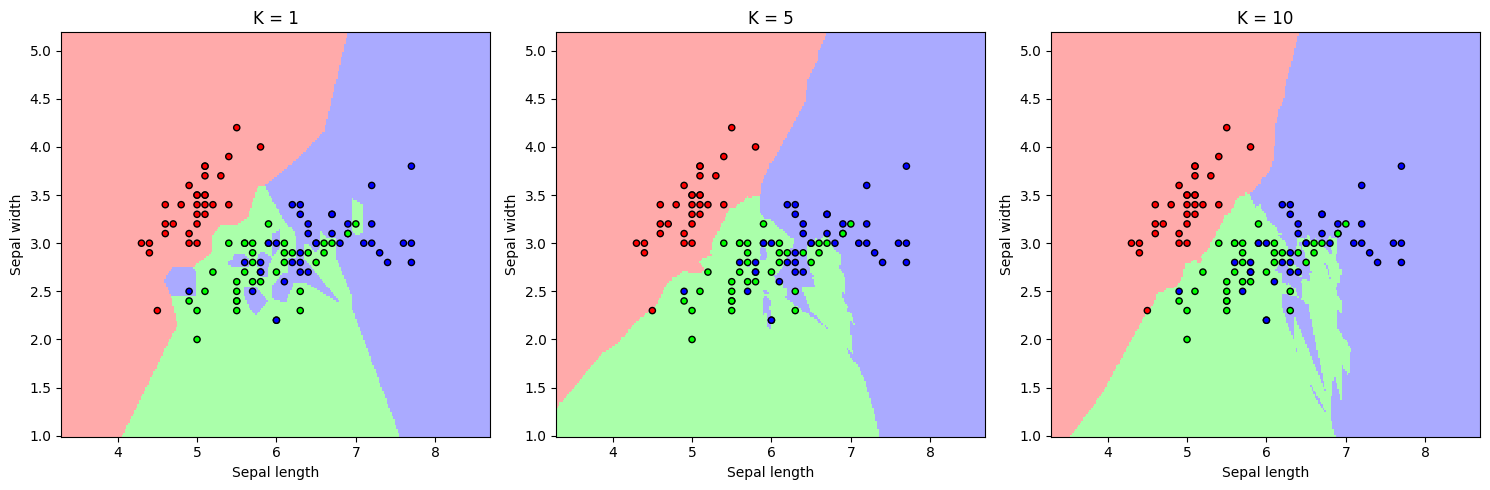

In [5]:
# Ques 24- Train a KNN Classifier with different values of K and visualize decision boundaried.

# Reduce Iris to only 2 features
X_vis = X[:, :2]  # Only sepal length and width
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.3, random_state=42)

# Decision boundary plotting
def plot_decision_boundary(X, y, k_list):
    h = .02  # Mesh step size
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.figure(figsize=(15, 5))

    for i, k in enumerate(k_list):
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X, y)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.subplot(1, len(k_list), i + 1)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
        plt.title(f"K = {k}")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')

    plt.tight_layout()
    plt.show()

plot_decision_boundary(X_train_vis, y_train_vis, k_list=[1, 5, 10])


In [6]:
# Ques 25- Apply Feature Scaling before training a KNN model and compare results with unscaled data.

# Without scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
acc_unscaled = knn_unscaled.score(X_test, y_test)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
acc_scaled = knn_scaled.score(X_test_scaled, y_test)

print(f"Accuracy without Scaling: {acc_unscaled:.4f}")
print(f"Accuracy with Scaling: {acc_scaled:.4f}")


Accuracy without Scaling: 1.0000
Accuracy with Scaling: 1.0000


In [7]:
# Ques 26-Train a PCA model on synthetic data and print the explained variance ratio for each component.

# Synthetic dataset
X_pca_syn, _ = make_classification(n_samples=300, n_features=5, random_state=42)

# PCA
pca_syn = PCA()
pca_syn.fit(X_pca_syn)

print("Explained Variance Ratio (synthetic data):")
print(pca_syn.explained_variance_ratio_)


Explained Variance Ratio (synthetic data):
[0.59419682 0.25134238 0.1544608  0.         0.        ]


In [8]:
# Ques 27 Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# KNN after PCA
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
acc_pca = knn_pca.score(X_test_pca, y_test)

print(f"Accuracy without PCA: {acc_unscaled:.4f}")
print(f"Accuracy with PCA: {acc_pca:.4f}")




Accuracy without PCA: 1.0000
Accuracy with PCA: 1.0000


In [9]:
# Ques 28-Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.

param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)

print("Best Parameters from GridSearchCV:", grid_knn.best_params_)
print("Best Cross-Validation Score:", grid_knn.best_score_)


Best Parameters from GridSearchCV: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best Cross-Validation Score: 0.9428571428571428


In [10]:
#  Ques 29- Train a KNN Classifier and check the number of misclassified samples.

y_pred_train = knn.predict(X_train)
misclassified_samples = (y_train != y_pred_train).sum()

print(f"Number of misclassified samples in training set: {misclassified_samples}")


Number of misclassified samples in training set: 5


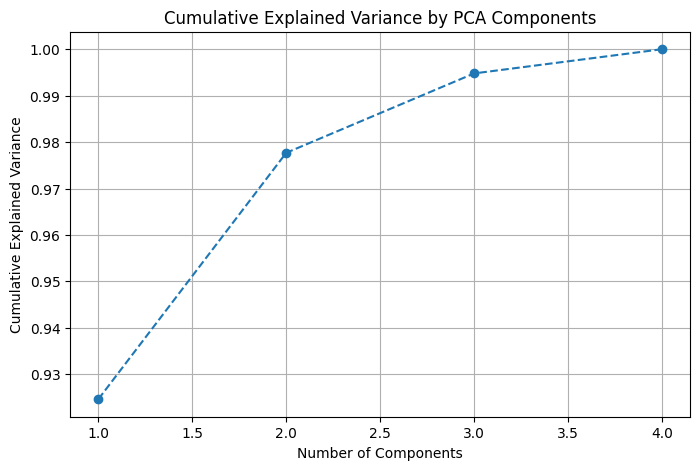

In [11]:
# Ques 30-  Train a PCA model and visualize the cumulative explained variance.

pca_full = PCA()
pca_full.fit(X)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()




In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_regression, make_classification
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')


In [13]:
# Ques 31- Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy.

# Load data
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Uniform weights
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_train, y_train)
acc_uniform = knn_uniform.score(X_test, y_test)

# Distance weights
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train, y_train)
acc_distance = knn_distance.score(X_test, y_test)

print(f"Accuracy with uniform weights: {acc_uniform:.4f}")
print(f"Accuracy with distance weights: {acc_distance:.4f}")


Accuracy with uniform weights: 1.0000
Accuracy with distance weights: 1.0000


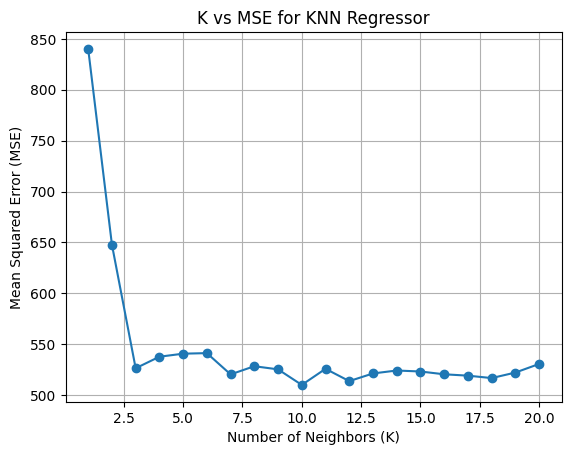

In [14]:
# Ques 32- Train a KNN Regressor and analyze the effect of different K values on performance.

# Regression dataset
X_reg, y_reg = make_regression(n_samples=300, n_features=1, noise=20, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, random_state=42)

k_values = range(1, 21)
mse_scores = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_reg, y_train_reg)
    y_pred_reg = knn_reg.predict(X_test_reg)
    mse = np.mean((y_test_reg - y_pred_reg) ** 2)
    mse_scores.append(mse)

plt.plot(k_values, mse_scores, marker='o')
plt.title('K vs MSE for KNN Regressor')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()


In [15]:
# Ques 33- Implement KNN Imputation for handling missing values in a dataset.
# Create dataset with missing values
rng = np.random.RandomState(0)
X_missing = rng.rand(10, 4)
X_missing[rng.randint(0, 10, 5), rng.randint(0, 4, 5)] = np.nan

print("Original Data with Missing Values:")
print(X_missing)

# KNN Imputer
imputer = KNNImputer(n_neighbors=2)
X_imputed = imputer.fit_transform(X_missing)

print("\nData after KNN Imputation:")
print(X_imputed)



Original Data with Missing Values:
[[0.5488135  0.71518937 0.60276338 0.54488318]
 [0.4236548  0.64589411        nan        nan]
 [0.96366276 0.38344152 0.79172504 0.52889492]
 [0.56804456 0.92559664 0.07103606 0.0871293 ]
 [0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918]
 [0.11827443 0.63992102 0.14335329 0.94466892]
 [0.52184832 0.41466194 0.26455561        nan]
 [0.45615033        nan 0.0187898  0.6176355 ]
 [0.61209572 0.616934   0.94374808        nan]]

Data after KNN Imputation:
[[0.5488135  0.71518937 0.60276338 0.54488318]
 [0.4236548  0.64589411 0.31077659 0.58125934]
 [0.96366276 0.38344152 0.79172504 0.52889492]
 [0.56804456 0.92559664 0.07103606 0.0871293 ]
 [0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918]
 [0.11827443 0.63992102 0.14335329 0.94466892]
 [0.52184832 0.41466194 0.26455561 0.58125934]
 [0.45615033 0.53027803 0.0187898  0.6176355 ]
 [0.61209572 0.616934   0.94374808 0.536889

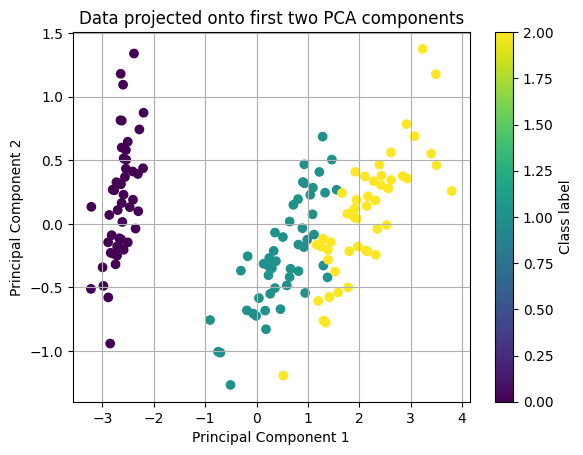

In [16]:
# Ques 34- Train a PCA model and visualize the data projection onto the first two principal components.

# PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis')
plt.title('Data projected onto first two PCA components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class label')
plt.grid(True)
plt.show()


In [17]:
# Ques 35- Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance.

# KD Tree (default for 'auto')
knn_kd = KNeighborsClassifier(algorithm='kd_tree')
knn_kd.fit(X_train, y_train)
acc_kd = knn_kd.score(X_test, y_test)

# Ball Tree
knn_ball = KNeighborsClassifier(algorithm='ball_tree')
knn_ball.fit(X_train, y_train)
acc_ball = knn_ball.score(X_test, y_test)

print(f"Accuracy using KD Tree: {acc_kd:.4f}")
print(f"Accuracy using Ball Tree: {acc_ball:.4f}")


Accuracy using KD Tree: 1.0000
Accuracy using Ball Tree: 1.0000


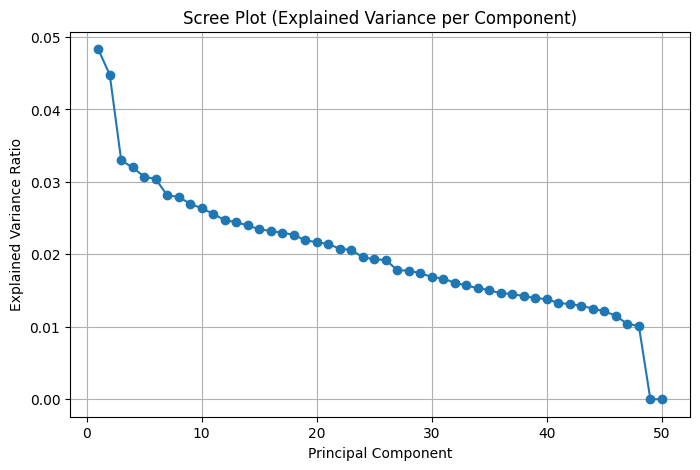

In [18]:
# Ques 36- Train a PCA model on a high-dimensional dataset and visualize the Scree plot.

# High-dimensional synthetic data
X_high, _ = make_classification(n_samples=500, n_features=50, random_state=42)

pca_high = PCA()
pca_high.fit(X_high)

# Scree Plot
plt.figure(figsize=(8,5))
plt.plot(np.arange(1, 51), pca_high.explained_variance_ratio_, marker='o')
plt.title('Scree Plot (Explained Variance per Component)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


In [19]:
# Ques 37- Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score.

knn_eval = KNeighborsClassifier(n_neighbors=5)
knn_eval.fit(X_train, y_train)
y_pred_eval = knn_eval.predict(X_test)

precision = precision_score(y_test, y_pred_eval, average='macro')
recall = recall_score(y_test, y_pred_eval, average='macro')
f1 = f1_score(y_test, y_pred_eval, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


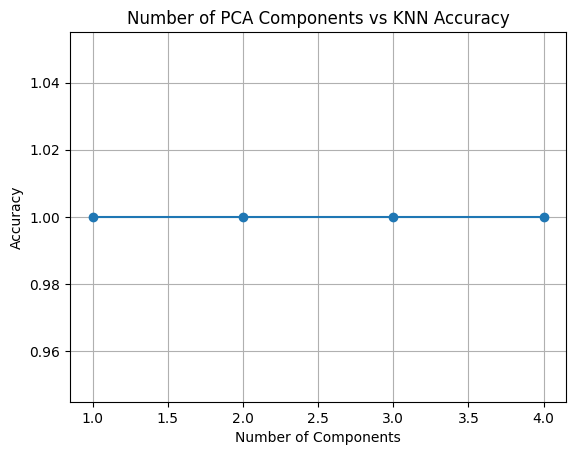

In [20]:
# Ques 38- Train a PCA model and analyze the effect of different numbers of components on accuracy.

components = [1, 2, 3, 4]
accuracy_list = []

for n in components:
    pca_comp = PCA(n_components=n)
    X_train_pca = pca_comp.fit_transform(X_train)
    X_test_pca = pca_comp.transform(X_test)

    knn_comp = KNeighborsClassifier(n_neighbors=5)
    knn_comp.fit(X_train_pca, y_train)
    acc = knn_comp.score(X_test_pca, y_test)
    accuracy_list.append(acc)

plt.plot(components, accuracy_list, marker='o')
plt.title('Number of PCA Components vs KNN Accuracy')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


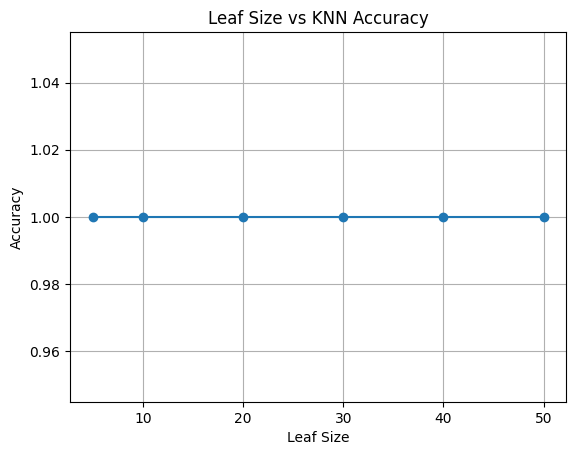

In [21]:
# Ques 39-  Train a KNN Classifier with different leaf_size values and compare accuracy.

leaf_sizes = [5, 10, 20, 30, 40, 50]
leaf_accuracies = []

for leaf in leaf_sizes:
    knn_leaf = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf)
    knn_leaf.fit(X_train, y_train)
    acc = knn_leaf.score(X_test, y_test)
    leaf_accuracies.append(acc)

plt.plot(leaf_sizes, leaf_accuracies, marker='o')
plt.title('Leaf Size vs KNN Accuracy')
plt.xlabel('Leaf Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


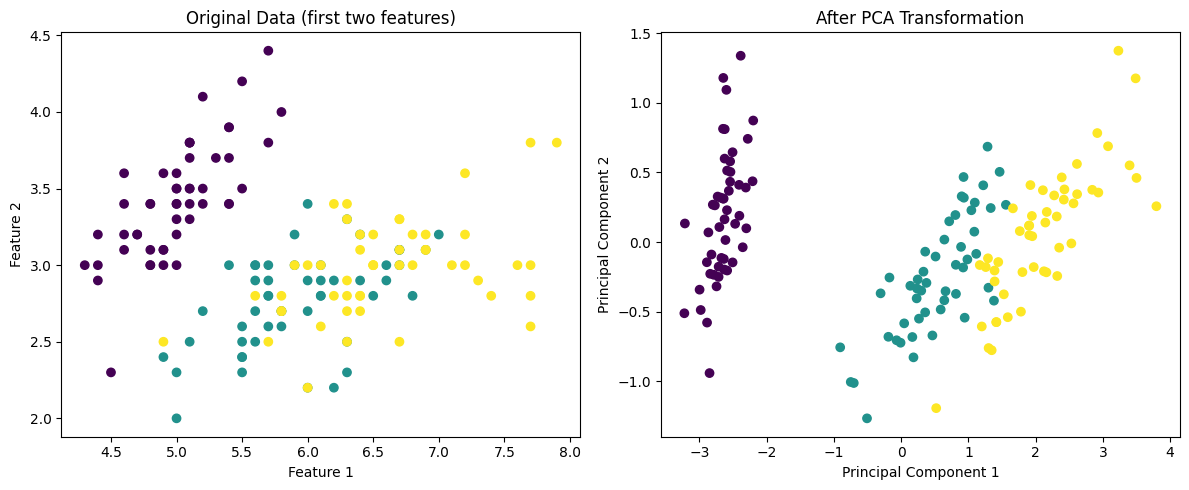

In [22]:
# Ques 40- Train a PCA model and visualize how data points are transformed before and after PCA.

# Before PCA
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Original Data (first two features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# After PCA
pca_final = PCA(n_components=2)
X_pca_final = pca_final.fit_transform(X)

plt.subplot(1, 2, 2)
plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=y, cmap='viridis')
plt.title('After PCA Transformation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine, make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report, mean_squared_error, roc_auc_score, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')


In [24]:
# Ques 41- Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report.

# Load Wine dataset
wine = load_wine()
X_wine, y_wine = wine.data, wine.target
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, random_state=42)

# Train KNN Classifier
knn_wine = KNeighborsClassifier(n_neighbors=5)
knn_wine.fit(X_train_wine, y_train_wine)
y_pred_wine = knn_wine.predict(X_test_wine)

# Classification Report
print("Classification Report on Wine Dataset:\n")
print(classification_report(y_test_wine, y_pred_wine))


Classification Report on Wine Dataset:

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.72      0.72      0.72        18
           2       0.50      0.50      0.50        12

    accuracy                           0.71        45
   macro avg       0.70      0.70      0.70        45
weighted avg       0.71      0.71      0.71        45



In [25]:
# Ques 42- Train a KNN Regressor and analyze the effect of different distance metrics on prediction error.

# Regression dataset
X_reg, y_reg = make_regression(n_samples=300, n_features=2, noise=20, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, random_state=42)

metrics = ['euclidean', 'manhattan', 'chebyshev']
mse_list = []

for metric in metrics:
    knn_reg = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn_reg.fit(X_train_reg, y_train_reg)
    y_pred_reg = knn_reg.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    mse_list.append(mse)

for metric, mse in zip(metrics, mse_list):
    print(f"MSE using {metric} distance: {mse:.4f}")


MSE using euclidean distance: 694.1164
MSE using manhattan distance: 610.6237
MSE using chebyshev distance: 798.7567


ROC-AUC Score: 0.9667


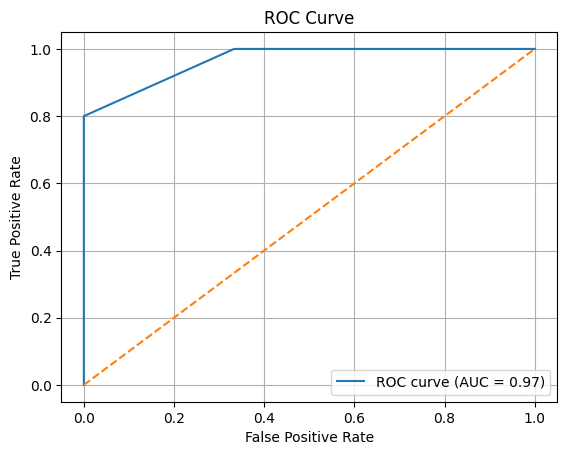

In [26]:
# ques 43- Train a KNN Classifier and evaluate using ROC-AUC score.


# Use only 2 classes for ROC-AUC (binary classification)
X_bin = X_wine[y_wine != 2]
y_bin = y_wine[y_wine != 2]

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, random_state=42)

knn_roc = KNeighborsClassifier(n_neighbors=5)
knn_roc.fit(X_train_bin, y_train_bin)
y_score_bin = knn_roc.predict_proba(X_test_bin)[:, 1]

roc_auc = roc_auc_score(y_test_bin, y_score_bin)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_bin, y_score_bin)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()




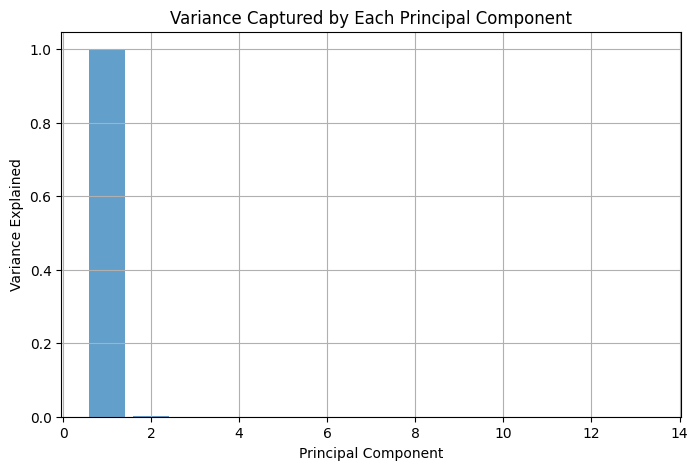

In [27]:
# Ques 44-  Train a PCA model and visualize the variance captured by each principal component.

pca_wine = PCA()
pca_wine.fit(X_wine)

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(pca_wine.explained_variance_ratio_)+1), pca_wine.explained_variance_ratio_, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Captured by Each Principal Component')
plt.grid(True)
plt.show()


In [28]:
# Ques 45- Train a KNN Classifier and perform feature selection before training.

# Feature Selection
selector = SelectKBest(f_classif, k=8)  # select top 8 features
X_new = selector.fit_transform(X_wine, y_wine)

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_new, y_wine, random_state=42)

knn_fs = KNeighborsClassifier(n_neighbors=5)
knn_fs.fit(X_train_fs, y_train_fs)
acc_fs = knn_fs.score(X_test_fs, y_test_fs)

print(f"Accuracy after Feature Selection: {acc_fs:.4f}")


Accuracy after Feature Selection: 0.7556


Reconstruction Error (MSE): 0.1164


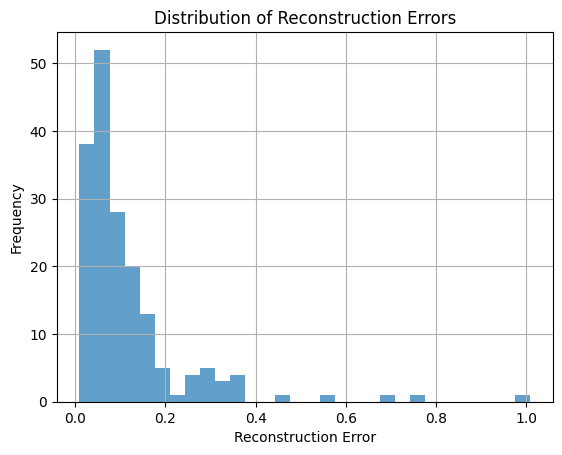

In [29]:
# Ques 46- Train a PCA model and visualize the data reconstruction error after reducing dimensions.

# Reduce to 5 components
pca_recon = PCA(n_components=5)
X_wine_reduced = pca_recon.fit_transform(X_wine)
X_wine_reconstructed = pca_recon.inverse_transform(X_wine_reduced)

# Reconstruction Error (MSE between original and reconstructed)
recon_error = mean_squared_error(X_wine, X_wine_reconstructed)
print(f"Reconstruction Error (MSE): {recon_error:.4f}")

# Visualization of Reconstruction Error
errors = np.mean((X_wine - X_wine_reconstructed)**2, axis=1)
plt.hist(errors, bins=30, alpha=0.7)
plt.title('Distribution of Reconstruction Errors')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


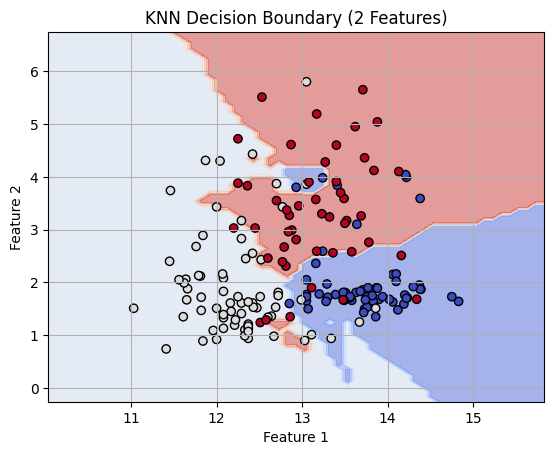

In [30]:
# Ques 47- Train a KNN Classifier and visualize the decision boundary.

# Use only first 2 features for easy visualization
X_vis = X_wine[:, :2]
y_vis = y_wine
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, random_state=42)

knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_vis, y_train_vis)

# Plotting decision boundary
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolor='k', cmap='coolwarm')
plt.title('KNN Decision Boundary (2 Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


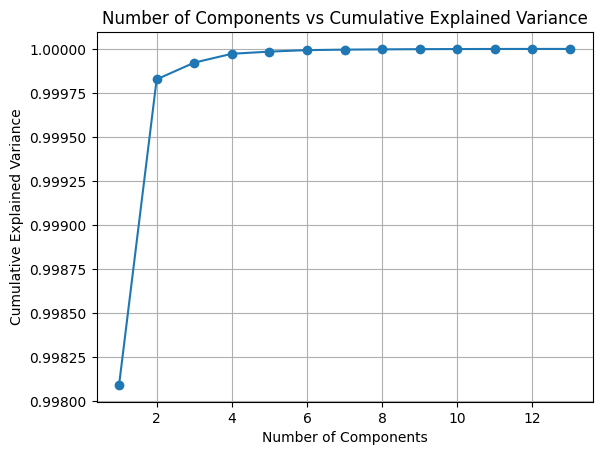

In [31]:
# Ques 48- Train a PCA model and analyze the effect of different numbers of components on data variance

components = range(1, X_wine.shape[1] + 1)
explained_var = []

for n in components:
    pca_var = PCA(n_components=n)
    pca_var.fit(X_wine)
    explained_var.append(np.sum(pca_var.explained_variance_ratio_))

plt.plot(components, explained_var, marker='o')
plt.title('Number of Components vs Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()
